In [1]:
import pandas as pd
import numpy as np
import tensorflow as tf
from sklearn.preprocessing import MinMaxScaler

/home/david/anaconda3/lib/python3.7/site-packages/tensorboard/compat/tensorflow_stub/dtypes.py:541: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
/home/david/anaconda3/lib/python3.7/site-packages/tensorboard/compat/tensorflow_stub/dtypes.py:542: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
/home/david/anaconda3/lib/python3.7/site-packages/tensorboard/compat/tensorflow_stub/dtypes.py:543: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
/home/david/anaconda3/lib/python3.7/site-packages/tensorboard/co

In [59]:
df=pd.read_csv("Delhi.csv")
df["date"]=pd.to_datetime(df["date"])
df.set_index("date",inplace=True)
df2=df.iloc[:,:1]

scaler=MinMaxScaler()
scaler.fit(df2)
df_scale=scaler.transform(df2)


# creating the generator function
def X_y_gen(df,windowsize=5):
    df_nump=df
    X=[]
    Y=[]
    for i in range(len(df_nump)-windowsize):
        row=df_nump[i:i+windowsize]
        lebel=df_nump[i+windowsize]
        X.append(row)
        Y.append(lebel)
    return np.array(X),np.array(Y)
    
# splitting the data into train, val and test
x,y= X_y_gen(df_scale)
X_train,Y_train=x[:60],y[:60]
X_val,Y_val=x[60:70],y[60:70]
X_test,Y_test=x[70:],y[70:]

# defining our model
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import InputLayer
from tensorflow.keras.layers import LSTM,Dense
from tensorflow.keras.callbacks import ModelCheckpoint
from tensorflow.keras.losses import MeanSquaredError
from tensorflow.keras.metrics import RootMeanSquaredError
from tensorflow.keras.optimizers import Adam

model=Sequential()
model.add(InputLayer((5,1)))
model.add(LSTM(64))
model.add(Dense(8,"relu"))
model.add(Dense(1,"linear"))

# model.summary()
cp=ModelCheckpoint("model1",save_best_only=True)
model.compile(loss=MeanSquaredError(),optimizer=Adam(), metrics=RootMeanSquaredError())
model.fit(X_train,Y_train, validation_data=(X_val,Y_val), epochs=10,callbacks=[cp])





Epoch 1/10
2/2 [==============================] - 6s 3s/step - loss: 0.1016 - root_mean_squared_error: 0.3188 - val_loss: 0.1557 - val_root_mean_squared_error: 0.3946
Epoch 2/10
2/2 [==============================] - 5s 2s/step - loss: 0.0857 - root_mean_squared_error: 0.2927 - val_loss: 0.1300 - val_root_mean_squared_error: 0.3606
Epoch 3/10
2/2 [==============================] - 4s 2s/step - loss: 0.0703 - root_mean_squared_error: 0.2651 - val_loss: 0.1062 - val_root_mean_squared_error: 0.3259
Epoch 4/10
2/2 [==============================] - 5s 3s/step - loss: 0.0556 - root_mean_squared_error: 0.2358 - val_loss: 0.0802 - val_root_mean_squared_error: 0.2832
Epoch 5/10
2/2 [==============================] - 5s 2s/step - loss: 0.0406 - root_mean_squared_error: 0.2015 - val_loss: 0.0569 - val_root_mean_squared_error: 0.2385
Epoch 6/10
2/2 [==============================] - 6s 3s/step - loss: 0.0282 - root_mean_squared_error: 0.1678 - val_loss: 0.0385 - val_root_mean_squared_error: 0.196

In [63]:
import matplotlib.pyplot as plt
from tensorflow.keras.models import load_model   

# loss_per_epoch=model.history.history["val_loss"]
# plt.figure(figsize=(6,4))
# plt.plot(range(len(loss_per_epoch)),loss_per_epoch)

model1=load_model("model1")

predic_Y=model1.predict(X_test)

predic_Y=scaler.inverse_transform(predic_Y)
Y_test=scaler.inverse_transform(Y_test)

# Note: if you are putting data in a frame it must be one dimensional
# test_result=pd.DataFrame(data={"prediction":predic_Y.flatten(),"Actuals":Y_test.flatten()}, index=range(len(Y_test)))

# test_result

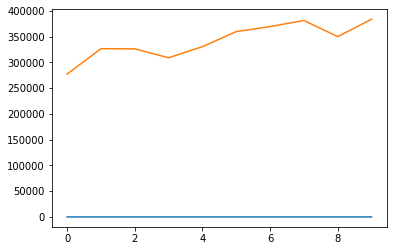

In [68]:
test_result=pd.DataFrame(data={"prediction":predic_Y.flatten(),"Actuals":Y_test.flatten()}, index=range(len(Y_test)))

plt.plot(test_result["prediction"][:10])
plt.plot(test_result["Actuals"][:10])